In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q "/content/drive/MyDrive/Project/dataset.zip" -d "/content"

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path = '/content/dataset'

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.25)

train_data = train_datagen.flow_from_directory(train_path, 
                                               target_size=(388, 374),
                                               batch_size=4,
                                               color_mode="grayscale",
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

val_data = train_datagen.flow_from_directory(train_path, 
                                           target_size=(388, 374),
                                           batch_size=4, 
                                           color_mode="grayscale",
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')

Found 60 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(388, 374, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(GlobalMaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 386, 372, 128)     1280      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 193, 186, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 191, 184, 128)     147584    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 95, 92, 128)      0         
 g2D)                                                            
                                                                 
 global_max_pooling2d_11 (Gl  (None, 128)              0         
 obalMaxPooling2D)                                               
                                                     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_data, validation_data=val_data, epochs=100,  verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 70ms/step - loss: 2.3633 - accuracy: 0.0833 - val_loss: 2.3005 - val_accuracy: 0.1000
Epoch 2/100
15/15 [==============================] - 1s 56ms/step - loss: 2.3084 - accuracy: 0.0667 - val_loss: 2.2940 - val_accuracy: 0.1000
Epoch 3/100
15/15 [==============================] - 1s 56ms/step - loss: 2.2998 - accuracy: 0.0500 - val_loss: 2.2829 - val_accuracy: 0.2500
Epoch 4/100
15/15 [==============================] - 1s 55ms/step - loss: 2.2910 - accuracy: 0.1667 - val_loss: 2.2701 - val_accuracy: 0.1500
Epoch 5/100
15/15 [==============================] - 1s 56ms/step - loss: 2.2791 - accuracy: 0.1000 - val_loss: 2.2544 - val_accuracy: 0.1000
Epoch 6/100
15/15 [==============================] - 1s 55ms/step - loss: 2.2543 - accuracy: 0.1333 - val_loss: 2.2184 - val_accuracy: 0.1500
Epoch 7/100
15/15 [==============================] - 1s 56ms/step - loss: 2.2253 - accuracy: 0.1333 - val_loss: 2.1737 - val_accuracy: 0.2000
Epoch 

In [ ]:
img = Image.open("/content/dataset/c3/103_7.tif")
x = np.asarray(img)
x = 2*x/255 - 1
x = np.transpose(x)
x = np.expand_dims(x,axis = 0)
images = np.vstack([x])

In [ ]:
print(val_data.class_indices)
dictionary = dict((v,k) for k,v in val_data.class_indices.items())
print(dictionary, "\n")

{'c1': 0, 'c10': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
{0: 'c1', 1: 'c10', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'} 



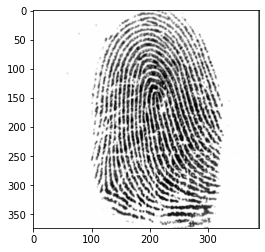


 c3 with confidence: 0.99999595


In [ ]:
im = cv2.imread('/content/dataset/c3/103_7.tif')
plt.imshow(im)
plt.show()
classes = model.predict(images)
max_index = np.argmax(classes[0])
print('\n', dictionary[max_index], "with confidence:", classes[0][max_index])